# Task 2 : Prediction Using Decision Tree Algorithm

## Abhinav Pratap Singh

In [1]:
# Importing all the required libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn import tree

In [2]:
#Importing the dataset
data = load_iris()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target

In [3]:
#Checking for null values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [4]:
#showing the detailed info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [5]:
# Showing first 10 values of our Dataset
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [6]:
# Showing first 10 values of our Dataset
df.tail(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
140,6.7,3.1,5.6,2.4,2
141,6.9,3.1,5.1,2.3,2
142,5.8,2.7,5.1,1.9,2
143,6.8,3.2,5.9,2.3,2
144,6.7,3.3,5.7,2.5,2
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [7]:
# Dimesion i.e. no. of rows and coulmns of our Dataset
df.shape

(150, 5)

In [8]:
# Showing only target data (Dependent Variable)
print(df['target'])

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32


In [9]:
# splitting data

fc = [x for x in df.columns if x!="target"]
x= df[fc]
y= df["target"]
X_train, X_test, Y_train, Y_test = train_test_split(x,y, random_state = 100, test_size = 0.20)

In [10]:
# Display of data
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [11]:
#building Desicion tree model

model1 = DecisionTreeClassifier()

In [12]:
model1.fit(X_train,Y_train)

DecisionTreeClassifier()

In [13]:
Y_pred = model1.predict(X_test)

In [14]:
data2 = pd.DataFrame({"Actual":Y_test,"Predicted":Y_pred})
data2.head()

,Actual,Predicted
128,2,2
11,0,0
118,2,2
15,0,0
123,2,2


In [15]:
# Testing the accuracy of model prediction
accuracy_score(Y_test,Y_pred)

0.9666666666666667

[Text(133.92000000000002, 199.32, 'Petal length <= 2.45\ngini = 0.665\nsamples = 120\nvalue = [39, 44, 37]\nclass = Versicolor'),
 Text(100.44000000000001, 163.07999999999998, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]\nclass = Setosa'),
 Text(167.40000000000003, 163.07999999999998, 'Petal width <= 1.65\ngini = 0.496\nsamples = 81\nvalue = [0, 44, 37]\nclass = Versicolor'),
 Text(66.96000000000001, 126.83999999999999, 'Petal length <= 4.95\ngini = 0.156\nsamples = 47\nvalue = [0, 43, 4]\nclass = Versicolor'),
 Text(33.480000000000004, 90.6, 'gini = 0.0\nsamples = 42\nvalue = [0, 42, 0]\nclass = Versicolor'),
 Text(100.44000000000001, 90.6, 'Petal width <= 1.55\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]\nclass = Virginica'),
 Text(66.96000000000001, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = Virginica'),
 Text(133.92000000000002, 54.359999999999985, 'Sepal length <= 6.6\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = Versicolor'),
 Text(100.440000

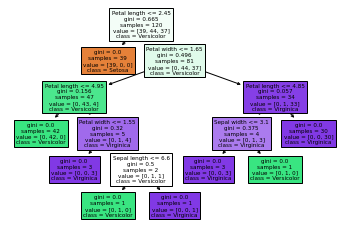

In [16]:
# Plotting
f_n = ["Sepal length", "Sepal width", "Petal length", "Petal width"]
c_n = ["Setosa", "Versicolor", "Virginica"]
plot_tree(model1,feature_names = f_n, class_names = c_n , filled = True)

In [17]:
modelx= DecisionTreeClassifier().fit(x,y)

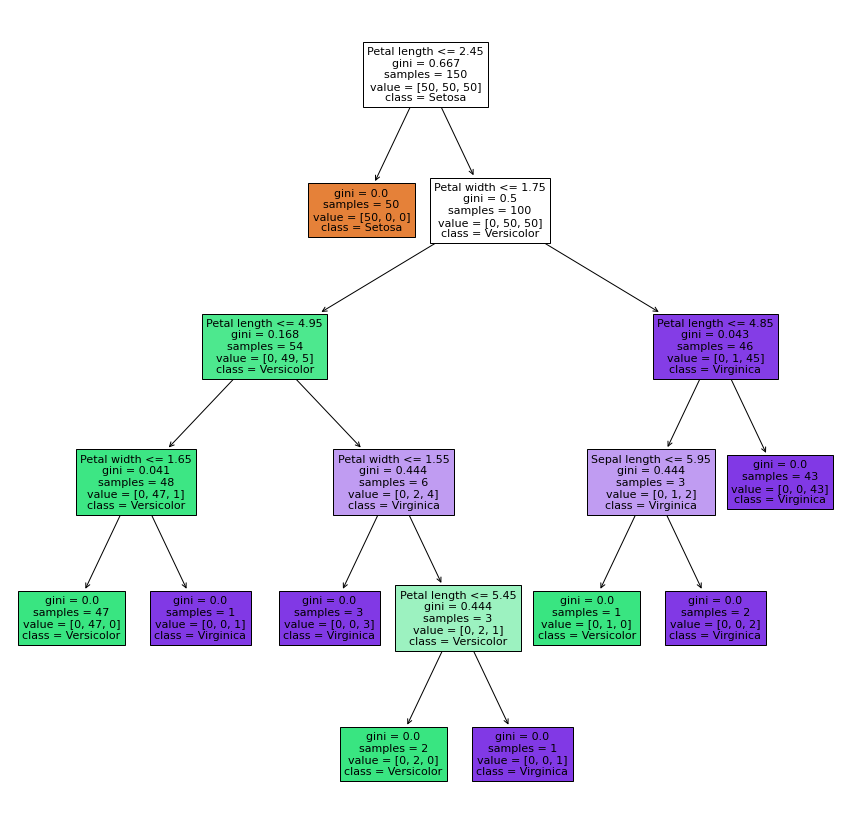

In [18]:
plt.figure(figsize = (15,15))
tree = tree.plot_tree(modelx, feature_names = f_n, class_names = c_n, filled = True)